In [272]:
import sklearn as sk
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

from numpy import argmax
import numpy as np

from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC

In [273]:
X, y = make_classification(n_samples= 1000, n_classes= 2, random_state= 1)

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2)

In [275]:
model = LogisticRegression().fit(X_train, y_train)

In [276]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [277]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

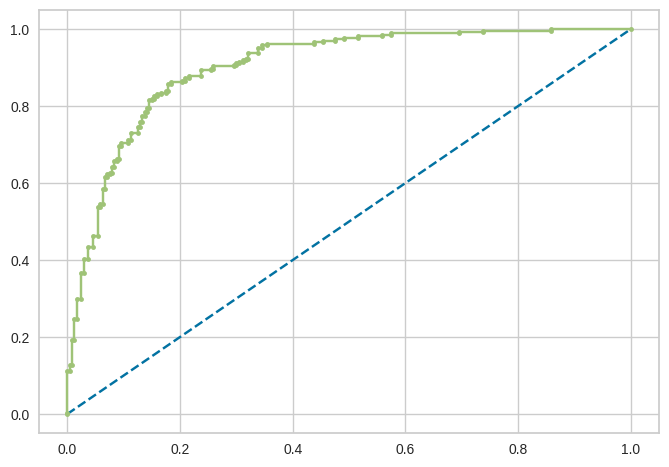

In [278]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

In [279]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [280]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

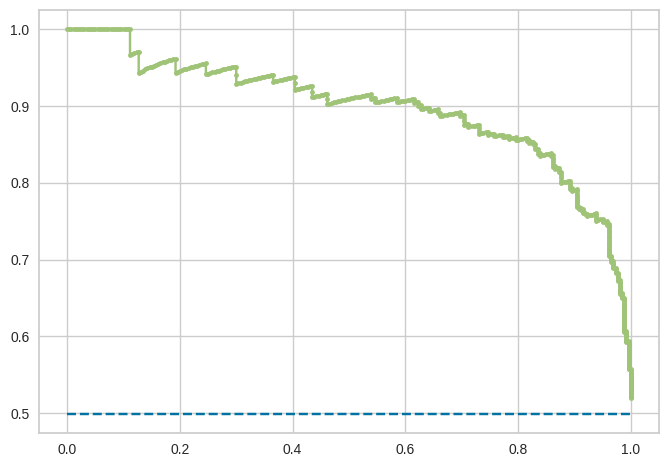

In [281]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(recall, precision, marker= ".")
plt.show()

In [282]:
auc(recall, precision)

0.8977244980325834

In [283]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



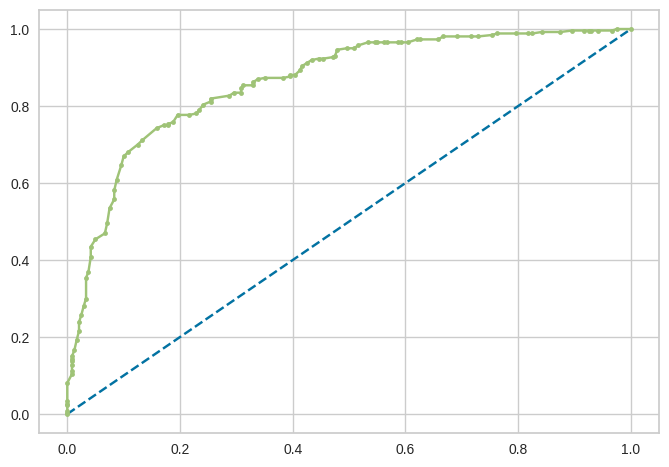

In [284]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

In [285]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [286]:
X, y = make_classification(n_samples= 1000, n_classes= 2, weights= [0.99, 0.01], random_state= 1)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2, stratify= y)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [288]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [289]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


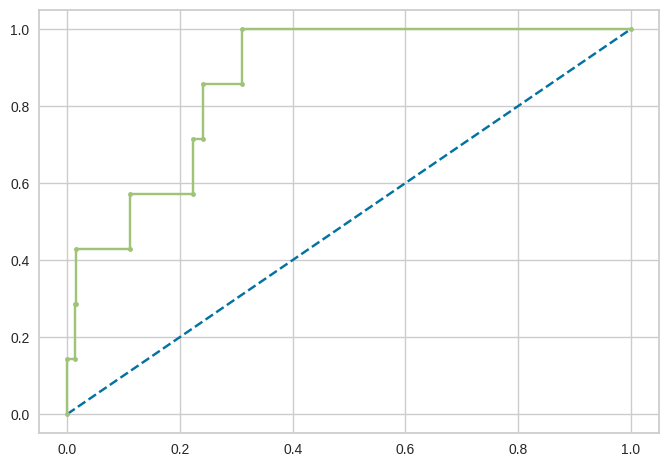

In [290]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.show()

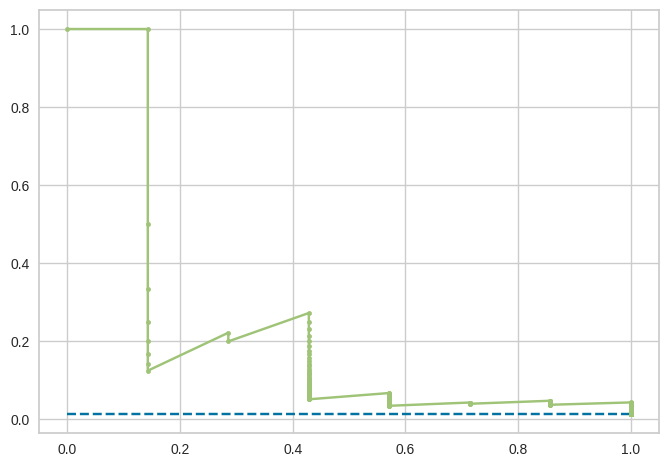

In [291]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(recall, precision, marker= ".")
plt.show()

In [292]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, weights= [0.99, 0.01], random_state= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, random_state= 2, stratify= y)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

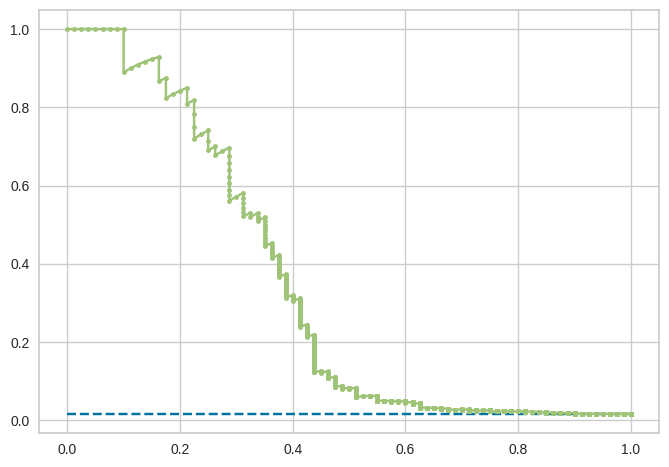

In [293]:
p, r, pr_tresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.show()

In [294]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("Порог=%f, F-Score=%.3f" % (pr_tresholds[ix], f1[ix]))

Порог=0.163799, F-Score=0.418


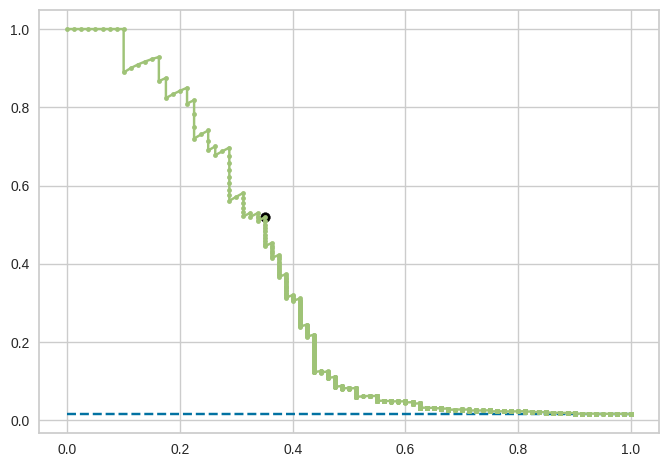

In [295]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.scatter(r[ix], p[ix], marker= "o", color= "black")
plt.show()

In [296]:
y_pred = (y_pred_proba[:, 1] > pr_tresholds[ix]).astype("int")

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.51      0.34      0.41        80

    accuracy                           0.98      5000
   macro avg       0.75      0.67      0.70      5000
weighted avg       0.98      0.98      0.98      5000



In [298]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.93      0.16      0.28        80

    accuracy                           0.99      5000
   macro avg       0.96      0.58      0.63      5000
weighted avg       0.99      0.99      0.98      5000



# Задания

№1 Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

Сначала проведём анализ с двумерным датасетом без дизбаланса классов

In [299]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, n_features= 2, n_informative= 2, n_redundant= 0, n_repeated= 0, n_clusters_per_class= 1)

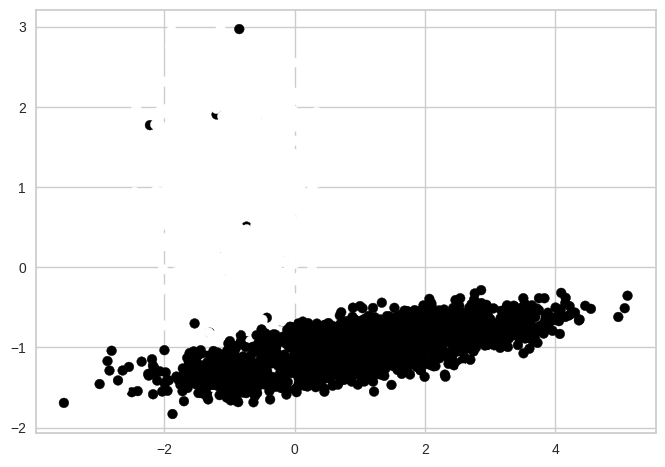

In [300]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=5010, Class1=4990
Обучающая: Class0=2535, Class1=2465
Тестовая: Class0=2475, Class1=2525


In [302]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [303]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

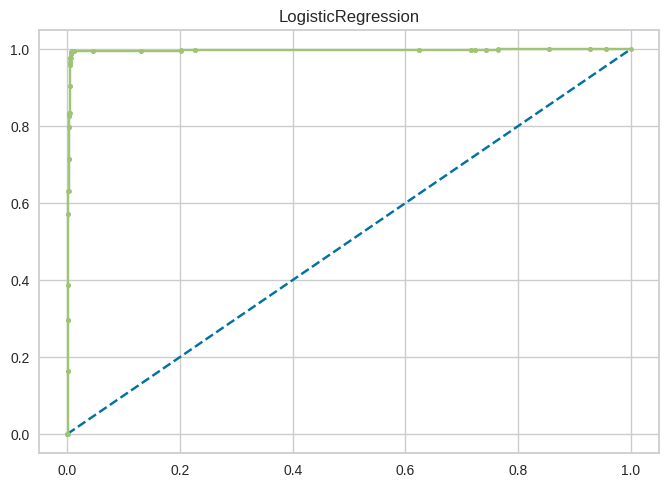

In [304]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("LogisticRegression")
plt.show()

ROC-AUC LogisticRegression:

In [305]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9952617661766177

In [306]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

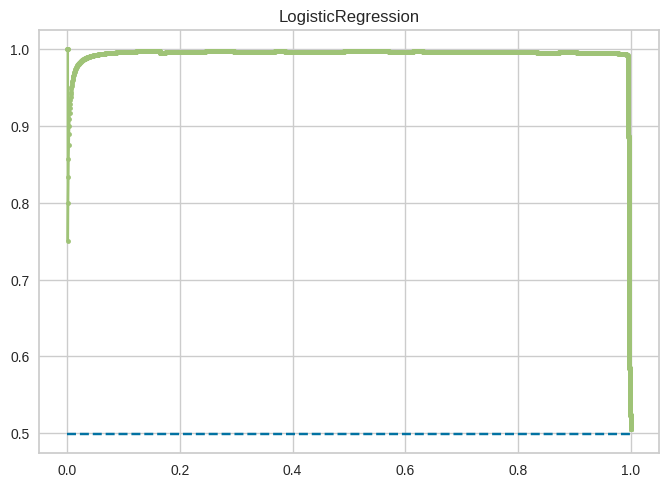

In [307]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.title("LogisticRegression")
plt.show()

PR-AUC LogisticRegression:

In [308]:
auc(r, p)

0.9934604420577245

In [309]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)

In [310]:
y_pred2_proba = model2.predict_proba(X_test)

In [311]:
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

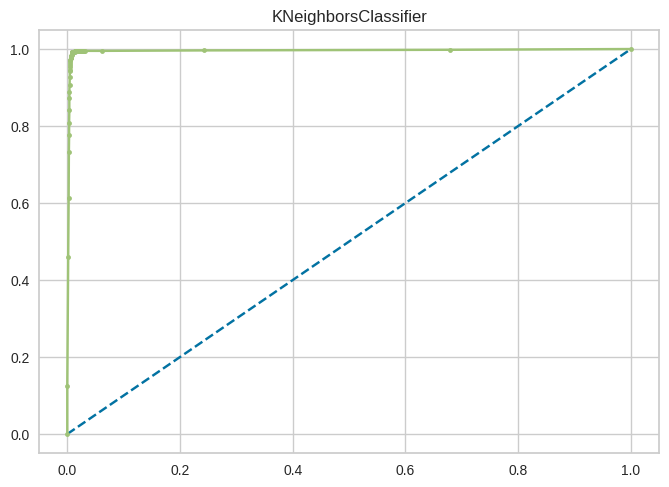

In [312]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

ROC-AUC KNeighborsClassifier:

In [313]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.9954578657865787

In [314]:
p2, r2, pr2_thresholds = precision_recall_curve(y_test, y_pred2_proba[:, 1])

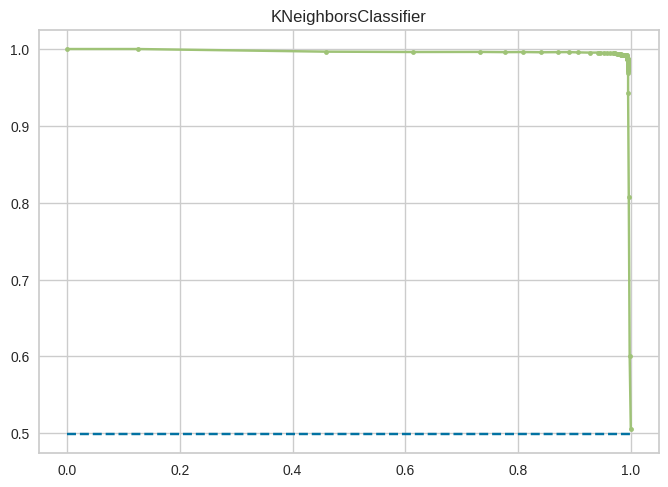

In [315]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r2, p2, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

PR-AUC KNeighborsClassifierPR-AUC:

In [316]:
auc(r2, p2)

0.9957099213784594

Найдём оптимальное значение порога для датасета без дизбаланса классов:

In [317]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("LogisticRegression:\nПорог=%f, F-Score=%.3f\n" % (pr_thresholds[ix], f1[ix]))

f1_2 = (2 * p2 * r2) / (p2 + r2)
ix_2 = argmax(f1_2)
print("KNeighborsClassifier:\nПорог=%f, F-Score=%.3f" % (pr2_thresholds[ix_2], f1_2[ix_2]))

LogisticRegression:
Порог=0.674733, F-Score=0.993

KNeighborsClassifier:
Порог=0.744000, F-Score=0.992


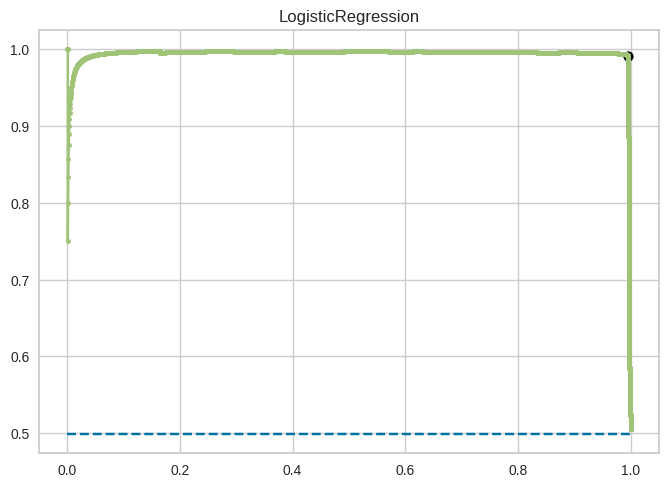

In [318]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

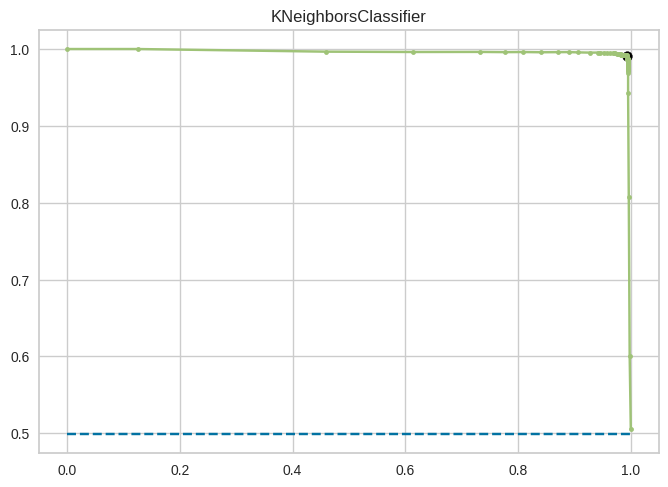

In [319]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix_2], p2[ix_2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [320]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_thresholds[ix_2]).astype('int')

Отчёт о классификации при оптимальном значении порога (LogisticRegression)

In [321]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2475
           1       0.99      0.99      0.99      2525

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



Отчёт о классификации при оптимальном значении порога (KNeighborsClassifier)

In [322]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2475
           1       0.99      0.99      0.99      2525

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



Проведём анализ двумерного датасета с дизбалансом классов

In [323]:
X, y = make_classification(n_samples= 10_000, n_classes= 2, n_features= 2, n_informative= 2, n_redundant= 0, n_repeated= 0, weights= [0.99, 0.01], n_clusters_per_class= 1)

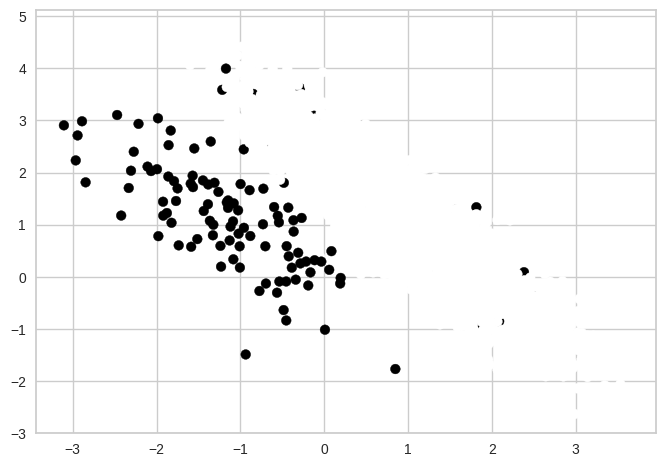

In [324]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5, stratify= y)
print("Датасет: Class0=%d, Class1=%d" % (len(y[y==0]), len(y[y==1])))
print("Обучающая: Class0=%d, Class1=%d" % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print("Тестовая: Class0=%d, Class1=%d" % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=9853, Class1=147
Обучающая: Class0=4926, Class1=74
Тестовая: Class0=4927, Class1=73


In [326]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [327]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

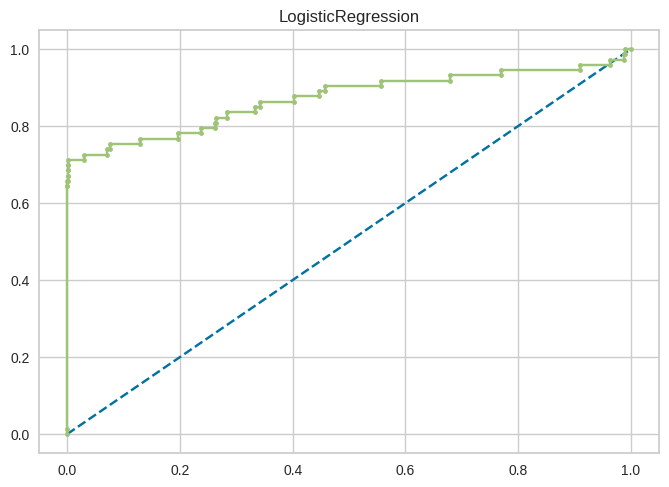

In [328]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("LogisticRegression")
plt.show()

ROC-AUC LogisticRegression:

In [329]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.8713963594507202

In [330]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

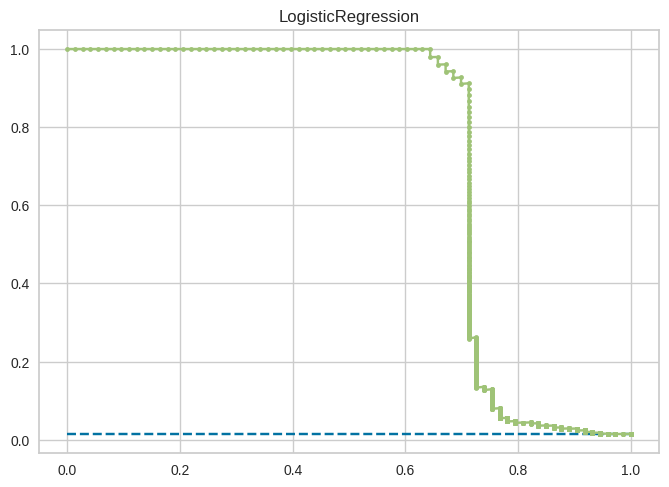

In [331]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r, p, marker= ".")
plt.title("LogisticRegression")
plt.show()

PR-AUC LogisticRegression:

In [332]:
auc(r, p)

0.7237576319756742

In [333]:
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)

In [334]:
y_pred2_proba = model2.predict_proba(X_test)

In [335]:
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

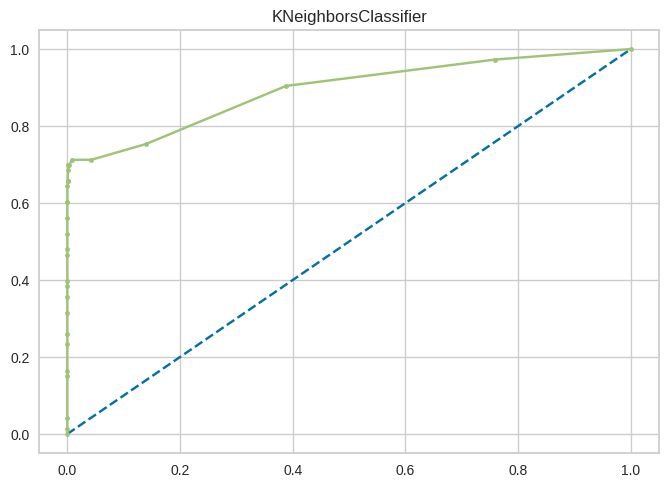

In [336]:
plt.plot([0, 1], [0, 1], linestyle= "--")
plt.plot(fpr, tpr, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

ROC-AUC KNeighborsClassifier:

In [337]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8929632914524662

In [338]:
p2, r2, pr2_thresholds = precision_recall_curve(y_test, y_pred2_proba[:, 1])

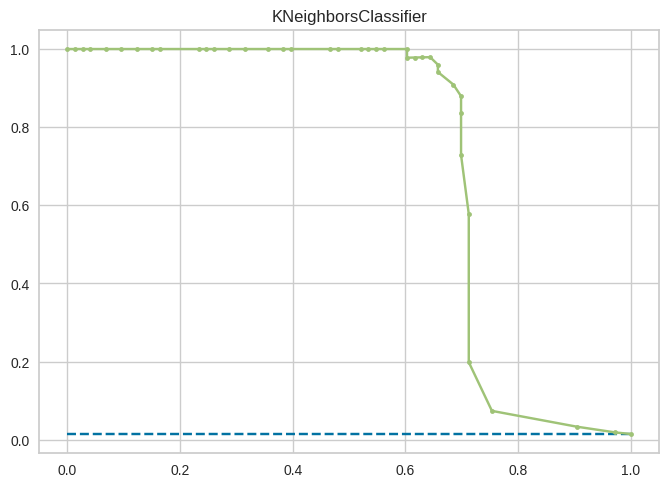

In [339]:
plt.plot([0, 1], [no_skill, no_skill], linestyle= "--")
plt.plot(r2, p2, marker= ".")
plt.title("KNeighborsClassifier")
plt.show()

PR-AUC KNeighborsClassifierPR-AUC:

In [340]:
auc(r2, p2)

0.7186842110433656

Найдём оптимальное значение порога для датасета с дизбаланса классов:

In [341]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
print("LogisticRegression:\nПорог=%f, F-Score=%.3f\n" % (pr_thresholds[ix], f1[ix]))

f1_2 = (2 * p2 * r2) / (p2 + r2)
ix_2 = argmax(f1_2)
print("KNeighborsClassifier:\nПорог=%f, F-Score=%.3f" % (pr2_thresholds[ix_2], f1_2[ix_2]))

LogisticRegression:
Порог=0.189975, F-Score=0.800

KNeighborsClassifier:
Порог=0.040000, F-Score=0.781


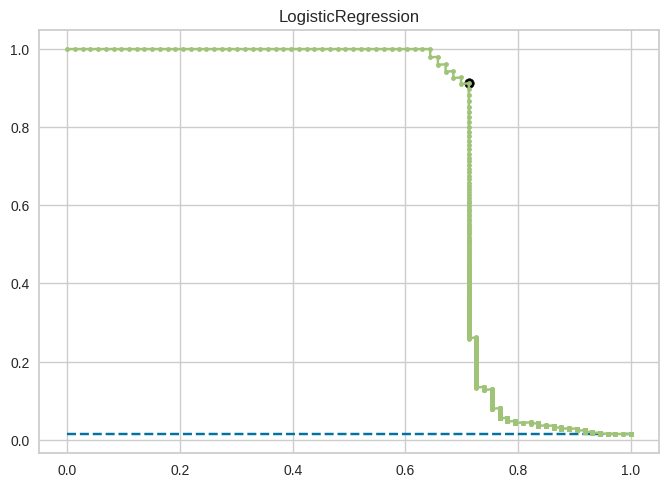

In [342]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

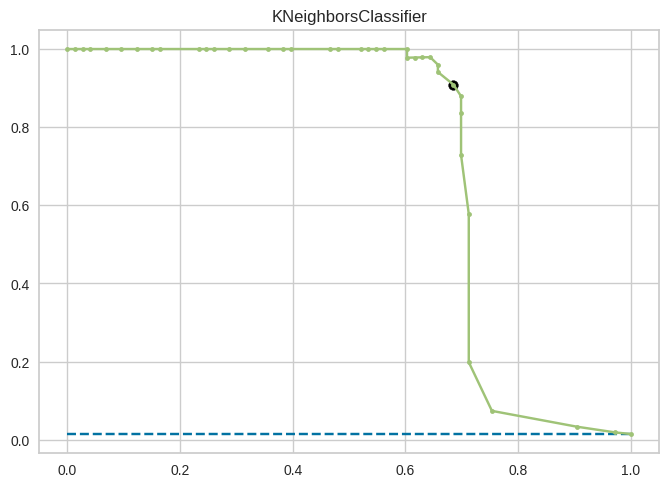

In [343]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix_2], p2[ix_2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [344]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_thresholds[ix_2]).astype('int')

lst = [0.1, 0.25, 0.5, 0.75, 0.9]
for i in range(len(lst)):
    if pr_thresholds[ix] <= lst[i]:
        lst[i] = pr_thresholds[ix]
        break

Отчёт о классификации при оптимальном значении порога (LogisticRegression)

In [345]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4927
           1       0.91      0.70      0.79        73

    accuracy                           0.99      5000
   macro avg       0.95      0.85      0.89      5000
weighted avg       0.99      0.99      0.99      5000



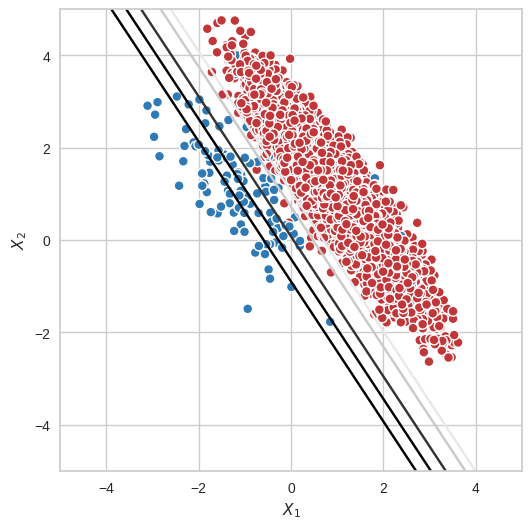

[0.1, 0.18997499063052836, 0.5, 0.75, 0.9]


In [346]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels= lst, cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()
print(lst)

Отчёт о классификации при оптимальном значении порога (KNeighborsClassifier)

In [347]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4927
           1       0.94      0.66      0.77        73

    accuracy                           0.99      5000
   macro avg       0.97      0.83      0.89      5000
weighted avg       0.99      0.99      0.99      5000



№2 Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [348]:
pip install ucimlrepo

In [349]:
from ucimlrepo import fetch_ucirepo

In [350]:
banknote_authentication = fetch_ucirepo(id=267)

X = banknote_authentication.data.features
y = banknote_authentication.data.targets

In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [352]:
model = LogisticRegression().fit(X_train, y_train)
model2 = KNeighborsClassifier(n_neighbors= 250).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [353]:
y_pred_proba = model.predict_proba(X_test)
y_pred2_proba = model2.predict_proba(X_test)

In [354]:
fpr, tpr, ft_threshold = roc_curve(y_test, y_pred_proba[:, 1])
fpr2, tpr2, ft2_threshold = roc_curve(y_test, y_pred2_proba[:, 1])

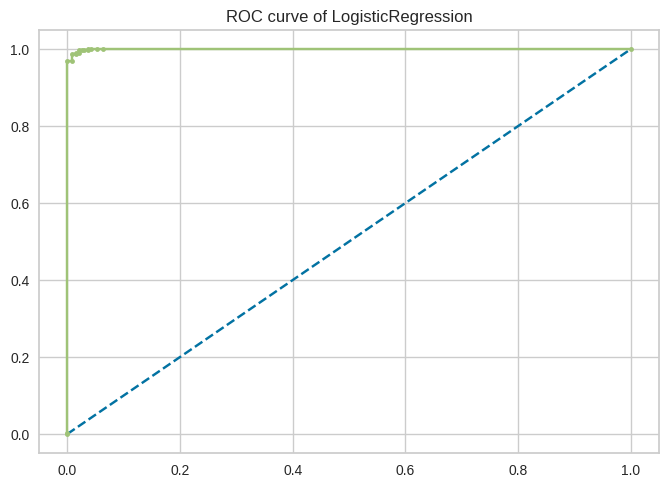

In [355]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC curve of LogisticRegression")
plt.show()

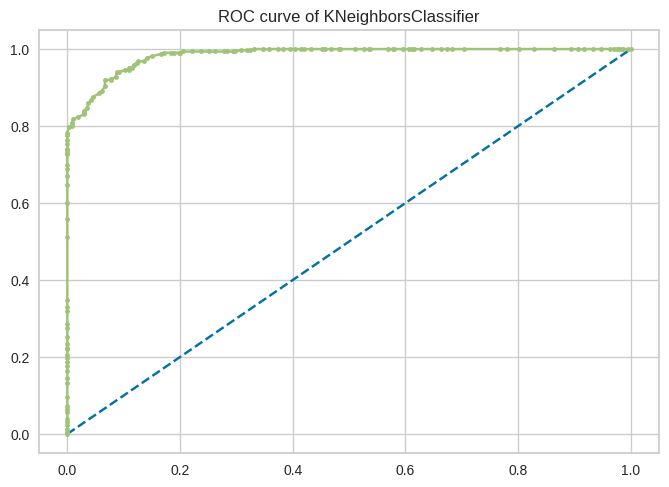

In [356]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr2, tpr2, marker='.')
plt.title("ROC curve of KNeighborsClassifier")
plt.show()

In [357]:
print(f"ROC-AUC Logreg: {roc_auc_score(y_test, y_pred_proba[:, 1])}\nROC-AUC Kneighbors: {roc_auc_score(y_test, y_pred2_proba[:, 1])}")

ROC-AUC Logreg: 0.999537227478404
ROC-AUC Kneighbors: 0.9843085835732895


In [358]:
p, r, pr_threshold = precision_recall_curve(y_test, y_pred_proba[:, 1])
p2, r2, pr2_threshold = precision_recall_curve(y_test, y_pred2_proba[:, 1])

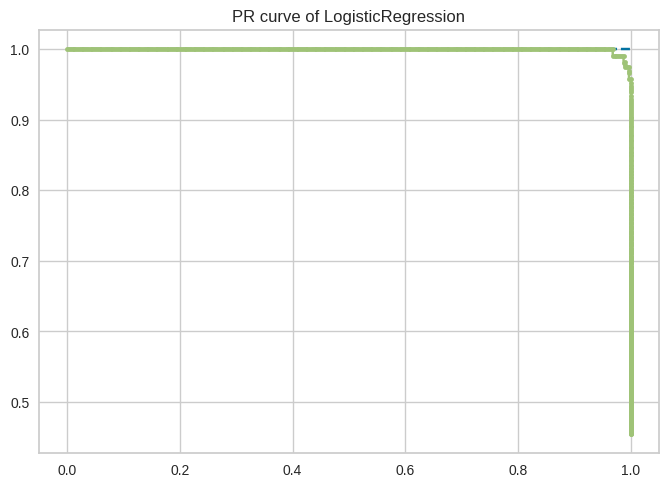

In [359]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.title("PR curve of LogisticRegression")
plt.show()

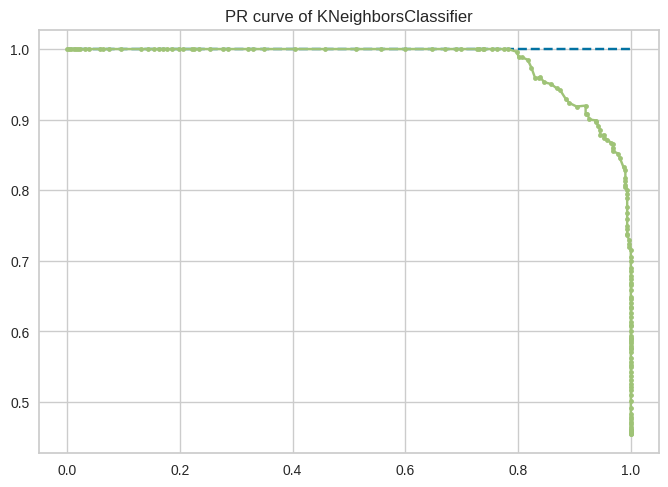

In [360]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.title("PR curve of KNeighborsClassifier")
plt.show()

In [361]:
print(f"PR-AUC Logreg: {auc(r, p)}\nPR-AUC Kneighbors: {auc(r2, p2)}")

PR-AUC Logreg: 0.9994524133736352
PR-AUC Kneighbors: 0.9825173924395492


3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [362]:
gmean = np.sqrt(tpr * (1 - fpr))
ix = np.argmax(gmean)
opt_threshold = ft_threshold[ix]
print("Оптимальный порог для LogisticRegression:", opt_threshold)

Оптимальный порог для LogisticRegression: 0.6515401028986596


In [363]:
gmean2 = np.sqrt(tpr2 * (1 - fpr2))
ix2 = np.argmax(gmean2)
opt_threshold2 = ft2_threshold[ix2]
print("Оптимальный порог для KNeighborsClassifier:", opt_threshold2)

Оптимальный порог для KNeighborsClassifier: 0.476


In [364]:
y_pred = (y_pred_proba[:, 1] > ft_threshold[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > ft2_threshold[ix2]).astype('int')

Отчёт о классификации LogisticRegression при оптимальном значении порога:

In [365]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       374
           1       0.99      0.98      0.99       312

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



При неоптимальном значении порога (дефолтном):

In [366]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       374
           1       0.98      0.99      0.99       312

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



Отчёт о классификации KNeighborsClassifier при оптимальном значении порога:

In [367]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       374
           1       0.92      0.90      0.91       312

    accuracy                           0.92       686
   macro avg       0.92      0.92      0.92       686
weighted avg       0.92      0.92      0.92       686



При неоптимальном значении порога (дефолтном):

In [368]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       374
           1       0.95      0.85      0.90       312

    accuracy                           0.91       686
   macro avg       0.92      0.91      0.91       686
weighted avg       0.91      0.91      0.91       686



В случае LogisticRegression точность практически одинаковая, что при найденном оптимальном значении порога, что при дефолтном, а у KNeighborsClassifier имеет немного большую точность, чем при дефолтном значении порога.

4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

Выбор оптимального значения порога по PR-кривой с преимуществом precision:

In [369]:
f2 = (1 + 0.5**2) * ((p * r) / ((0.5**2 * p) + r))
ix = np.argmax(f2)
opt_threshold = pr_threshold[ix]
print("Оптимальный порог для LogisticRegression:", opt_threshold)

Оптимальный порог для LogisticRegression: 0.7414146209149526


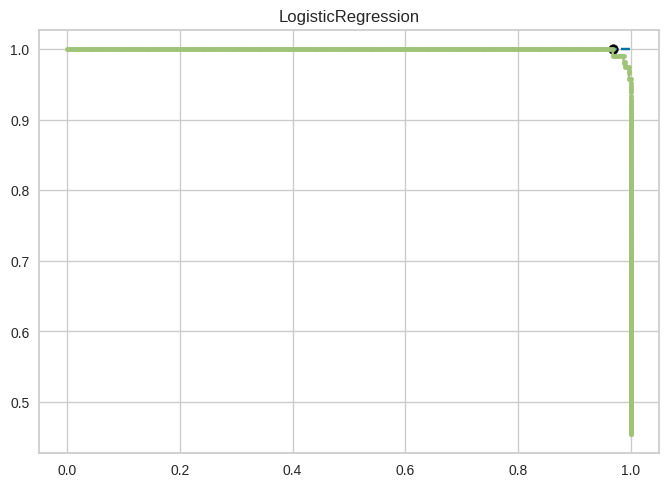

In [370]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

In [371]:
f22 = (1 + 0.5**2) * ((p2 * r2) / ((0.5**2 * p2) + r2))
ix2 = np.argmax(f22)
opt_threshold2 = pr2_threshold[ix2]
print("Оптимальный порог для KNeighborsClassifier:", opt_threshold2)

Оптимальный порог для KNeighborsClassifier: 0.536


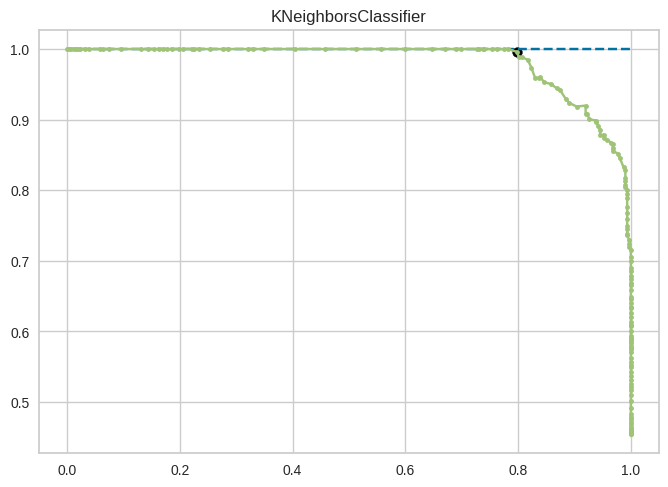

In [372]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix2], p2[ix2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [373]:
y_pred = (y_pred_proba[:, 1] > pr_threshold[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_threshold[ix2]).astype('int')

LogisticRegression

In [374]:
print(classification_report(y_test, y_pred)) # Оптимальное значение порога

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       374
           1       1.00      0.96      0.98       312

    accuracy                           0.98       686
   macro avg       0.99      0.98      0.98       686
weighted avg       0.98      0.98      0.98       686



In [375]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # Неоптимальное значение порога

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       374
           1       0.98      0.99      0.99       312

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



KNeighborsClassifier

In [376]:
print(classification_report(y_test, y_pred2)) # Оптимальное значение порога

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       374
           1       1.00      0.78      0.88       312

    accuracy                           0.90       686
   macro avg       0.92      0.89      0.90       686
weighted avg       0.92      0.90      0.90       686



In [377]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2)) # Неоптимальное значение порога

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       374
           1       0.95      0.85      0.90       312

    accuracy                           0.91       686
   macro avg       0.92      0.91      0.91       686
weighted avg       0.91      0.91      0.91       686



Выбор оптимального значения порога по PR-кривой с преимуществом recall:

In [378]:
f2 = (1 + 2**2) * ((p * r) / ((2**2 * p) + r))
ix = np.argmax(f2)
opt_threshold = pr_threshold[ix]
print("Оптимальный порог для LogisticRegression:", opt_threshold)

Оптимальный порог для LogisticRegression: 0.3886708444252651


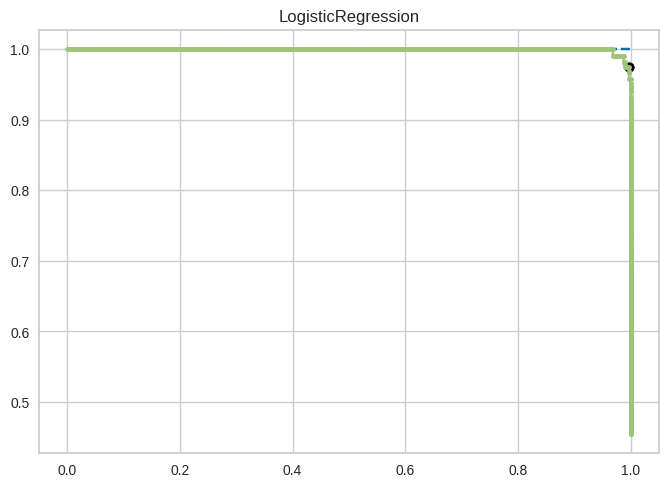

In [379]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.title("LogisticRegression")
plt.show()

In [380]:
f22 = (1 + 2**2) * ((p2 * r2) / ((2**2 * p2) + r2))
ix2 = np.argmax(f22)
opt_threshold2 = pr2_threshold[ix2]
print("Оптимальный порог для KNeighborsClassifier:", opt_threshold2)

Оптимальный порог для KNeighborsClassifier: 0.4


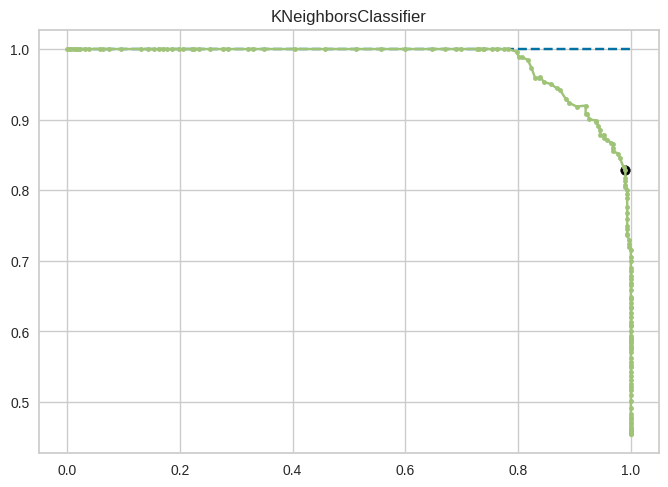

In [381]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r2, p2, marker='.')
plt.scatter(r2[ix2], p2[ix2], marker='o', color='black')
plt.title("KNeighborsClassifier")
plt.show()

In [382]:
y_pred = (y_pred_proba[:, 1] > pr_threshold[ix]).astype('int')
y_pred2 = (y_pred2_proba[:, 1] > pr2_threshold[ix2]).astype('int')

LogisticRegression

In [383]:
print(classification_report(y_test, y_pred)) # Оптимальное значение порога

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       374
           1       0.97      0.99      0.98       312

    accuracy                           0.99       686
   macro avg       0.98      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



In [384]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # Неоптимальное значение порога

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       374
           1       0.98      0.99      0.99       312

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686



KNeighborsClassifier

In [385]:
print(classification_report(y_test, y_pred2)) # Оптимальное значение порога

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       374
           1       0.83      0.99      0.90       312

    accuracy                           0.90       686
   macro avg       0.91      0.91      0.90       686
weighted avg       0.92      0.90      0.90       686



In [386]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2)) # Неоптимальное значение порога

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       374
           1       0.95      0.85      0.90       312

    accuracy                           0.91       686
   macro avg       0.92      0.91      0.91       686
weighted avg       0.91      0.91      0.91       686



5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.
6. Используйте для построения кривых библиотеку yellowbrick.

In [387]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1)

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [389]:
model = LogisticRegression().fit(X_train, y_train)

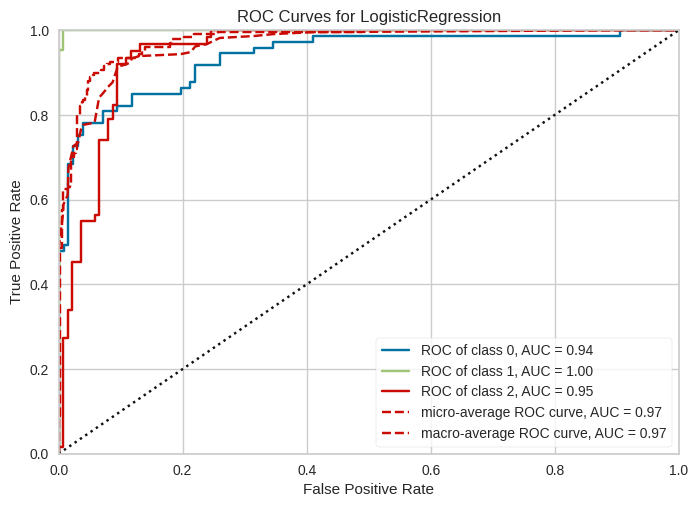

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [390]:
visualizer = ROCAUC(model, classes=[0, 1, 2])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

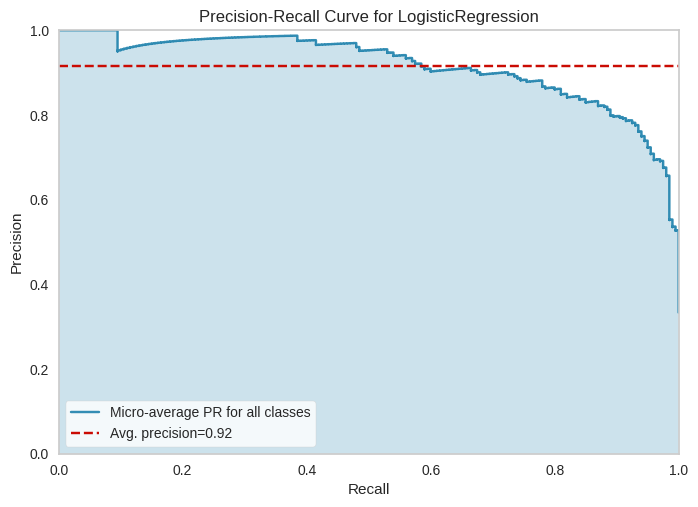

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [391]:
visualizer = PrecisionRecallCurve(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()